In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data from https://github.com/GregaVrbancic/Phishing-Dataset

In [2]:
df = pd.read_csv("data/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


### Exploratory Data Analysis

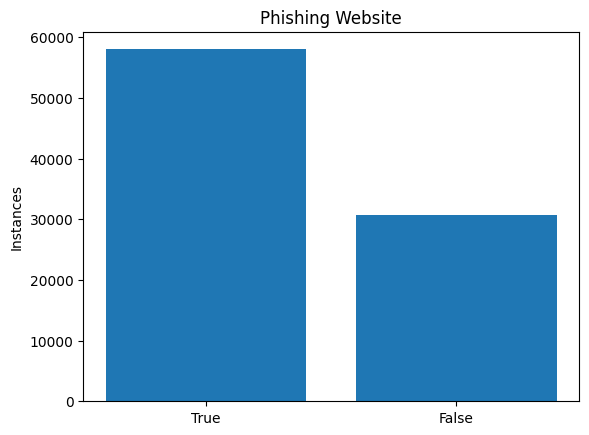

In [3]:
plt.bar(["True", "False"], df['phishing'].value_counts())
plt.title("Phishing Website")
plt.ylabel("Instances")
plt.show()

In [4]:
phish_true = df[df['phishing'] == True]
phish_false = df[df['phishing'] == False]

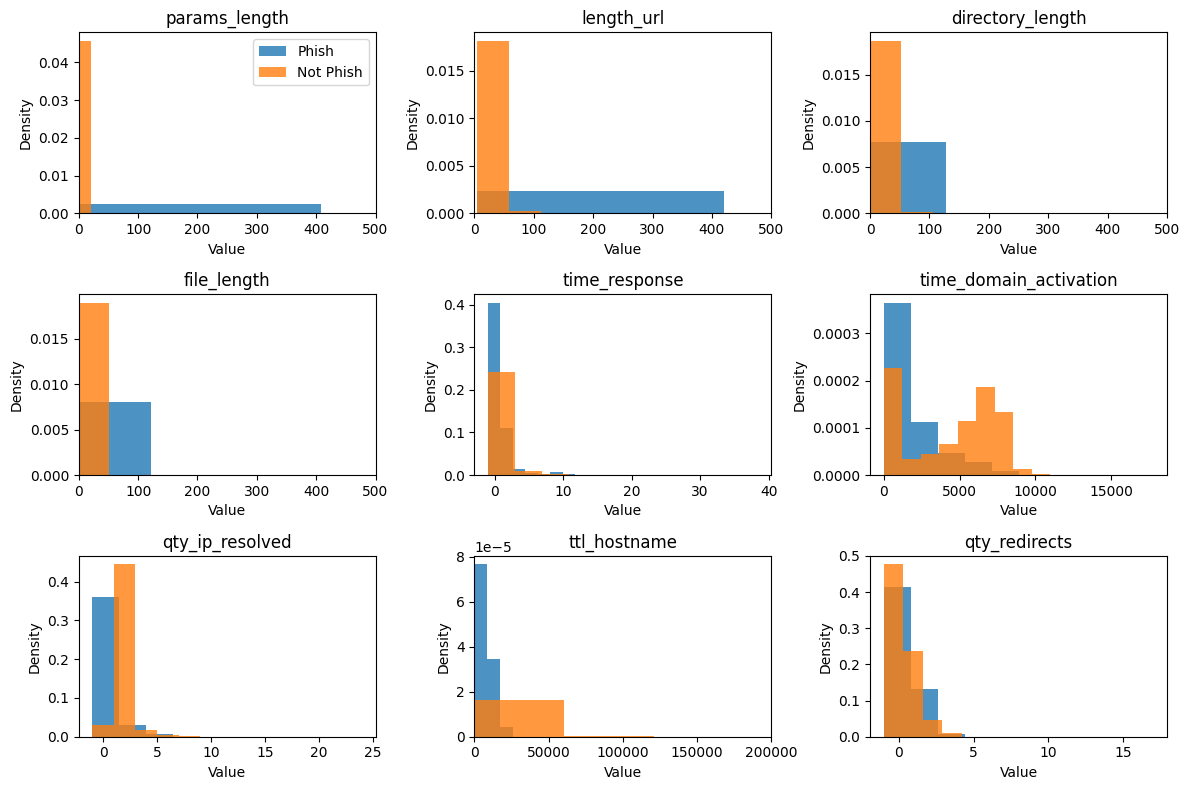

In [204]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.flatten()
columns = ['params_length', 'length_url', 'directory_length', 'file_length', 'time_response', 'time_domain_activation', 'qty_ip_resolved', 'ttl_hostname', 'qty_redirects']
for i, ax in enumerate(axs):
    column = columns[i]
    ax.hist(phish_true[column], density=True, label="Phish", alpha=0.8)
    ax.hist(phish_false[column], density=True, label="Not Phish", alpha=0.8)
    ax.set_title(column)
    ax.set_ylabel("Density")
    ax.set_xlabel("Value")
    if i == 0:
        ax.legend()
    if 'length' in column:
        ax.set_xlim(0, 500)
    if 'ttl_hostname' in column:
        ax.set_xlim(0, 2e5)
plt.tight_layout()
plt.show()

### Setting up

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop(labels='phishing', axis=1)
y = df['phishing']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=19)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate(model, model_name):
    fig, axs = plt.subplots(1, 2)
    axs = axs.flatten()

    ## training accuracy
    train_pred = model.predict(train_x)
    print("%s Train Accuracy %.3f" % (model_name, accuracy_score(train_y, train_pred)))
    confusion = confusion_matrix(train_y, train_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[0], colorbar=False, cmap='Blues')
    axs[0].set_title("Train Data")
    # plt.show()

    test_pred = model.predict(test_x)
    print("%s Test Accuracy %.3f" % (model_name, accuracy_score(test_y, test_pred)))
    confusion = confusion_matrix(test_y, test_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[1], colorbar=False, cmap='Blues')
    axs[1].set_title("Test Data")

    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# First Results

## KNN

KNN Train Accuracy 0.917
KNN Test Accuracy 0.879


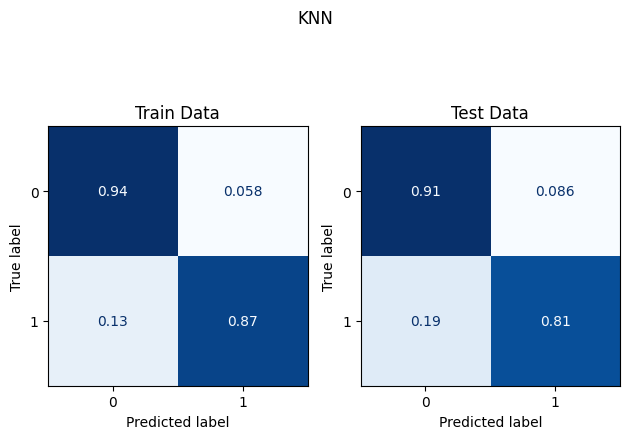

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)
evaluate(knn_model, "KNN")

## Logistic Regression

Logistic Regression Train Accuracy 0.913
Logistic Regression Test Accuracy 0.914


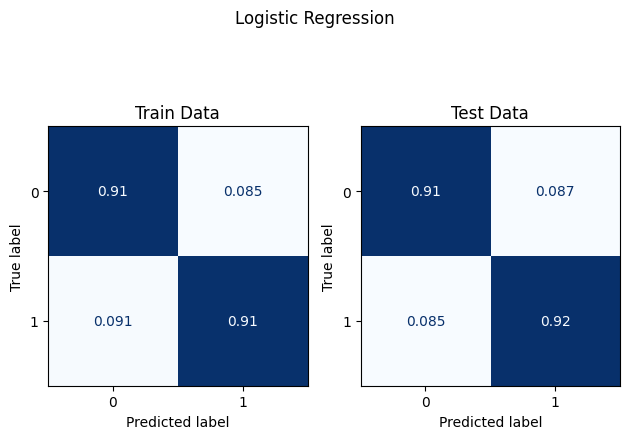

In [44]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000)
log_model.fit(train_x, train_y)
evaluate(log_model, "Logistic Regression")

## Linear SVC

Linear SVM Train Accuracy 0.760
Linear SVM Test Accuracy 0.752


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


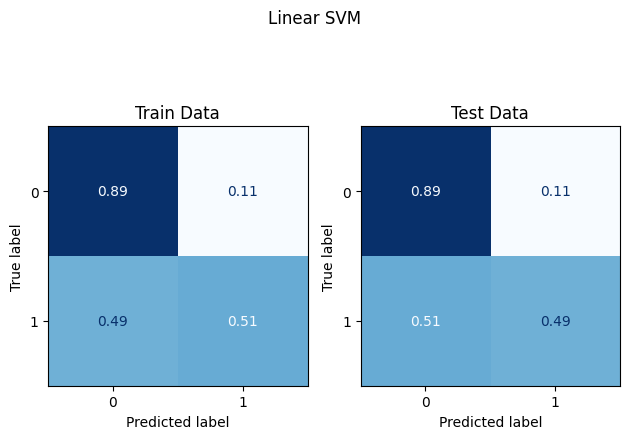

In [48]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC()
linear_svm.fit(train_x, train_y)
evaluate(linear_svm, "Linear SVM")

## Decision Tree

Decision Tree Train Accuracy 0.936
Decision Tree Test Accuracy 0.935


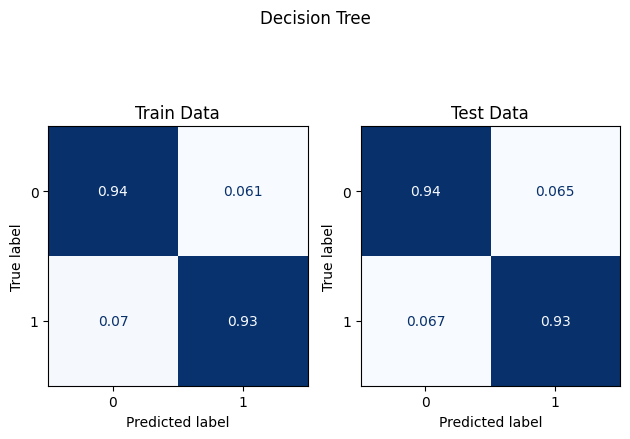

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(train_x, train_y)
evaluate(decision_tree, "Decision Tree")

## Naive Bayes

Naive Bayes Train Accuracy 0.846
Naive Bayes Test Accuracy 0.837


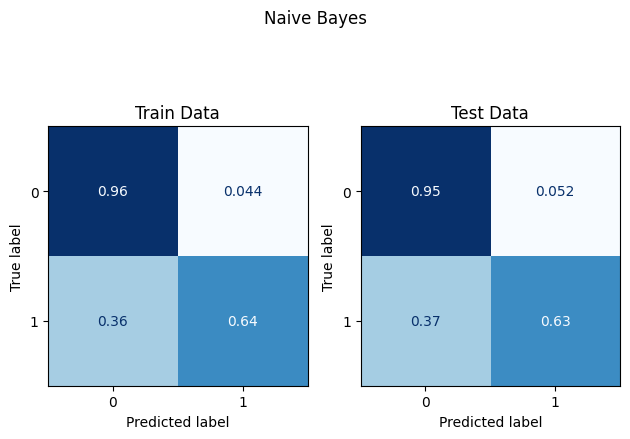

In [53]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)
evaluate(naive_bayes, "Naive Bayes")

## AdaBoost

AdaBoost Train Accuracy 0.936
AdaBoost Test Accuracy 0.931


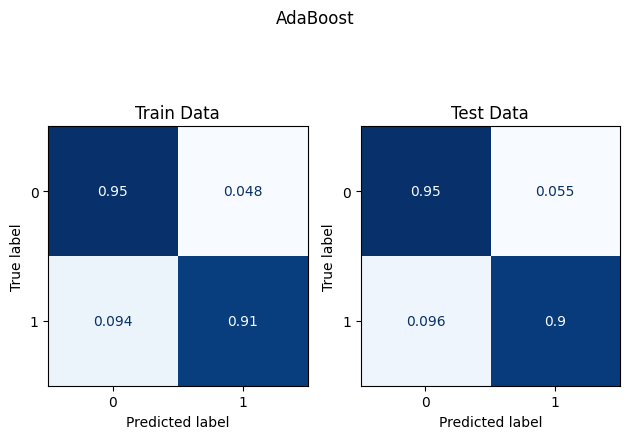

In [45]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(train_x, train_y)
evaluate(adaboost, "AdaBoost")

## Multi-layer Perceptron

MLP Train Accuracy 0.923
MLP Test Accuracy 0.919


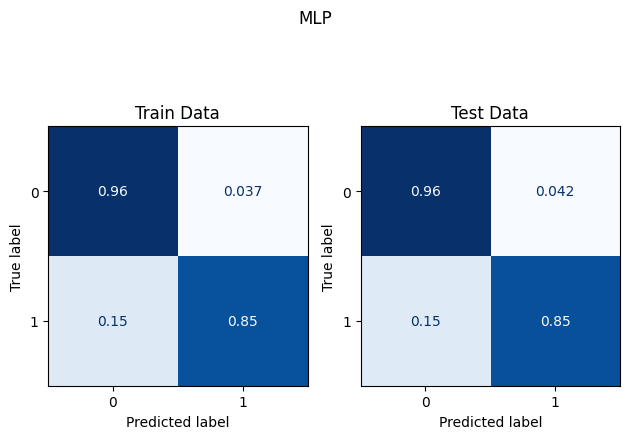

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(train_x, train_y)
evaluate(mlp, "MLP")

# Feature Importance

In [134]:
from heapq import nlargest
from sklearn.metrics import mean_squared_error

def permutation_importances(rf, metric): 
    baseline = metric(rf)
    imp = []
    for col in train_x.columns:
        save = train_x[col].copy()
        train_x[col] = np.random.permutation(train_x[col])
        m = metric(rf)
        train_x[col] = save
        imp.append(m - baseline)
    return np.array(imp)

def get_MSE(model):
    train_pred = model.predict(train_x)
    return mean_squared_error(train_y,train_pred)

def features(model):
    imp = permutation_importances(model, get_MSE)
    feature_importance = {}
    for i, feature in enumerate(x.columns.values.tolist()):
        feature_importance[feature] = round(imp[i], 5)

    for key, value in feature_importance.items():
        print(key, ': ', value)

    sorted = nlargest(5, feature_importance, key = feature_importance.get)
    print("Top 5 features: " + str(sorted))
    
    plt.bar([x for x in range(len(imp))], imp)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()
    
    return imp

In [159]:
# get all values from this model of identified features
def all_feature_values(model_features):
    features = ['qty_underline_params', 'ttl_hostname', 'params_length', 'length_url', 'time_response', 'time_domain_activation', 'directory_length', 'time_domain_expiration', 'qty_dot_directory', 'qty_slash_directory', 'asn_ip', 'qty_and_file', 'qty_dot_domain']
    feature_importance = {}
    for i, feature in enumerate(x.columns.values.tolist()):
        feature_importance[feature] = round(model_features[i], 5)
        
    for f in features:
        for key, value in feature_importance.items():
            if f==key:
                #print("'"+str(key)+"': "+str(value)+",")
                print(str(value)+",")

### KNN

qty_dot_url :  0.0
qty_hyphen_url :  8e-05
qty_underline_url :  0.0
qty_slash_url :  5e-05
qty_questionmark_url :  0.0
qty_equal_url :  -1e-05
qty_at_url :  0.0
qty_and_url :  -1e-05
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  0.0
qty_comma_url :  0.0
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.0
qty_tld_url :  1e-05
length_url :  0.02005
qty_dot_domain :  0.00011
qty_hyphen_domain :  1e-05
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  0.0004
domain_length :  0.00233
domain_in_ip :  0.0
server_client_domain :  0.0
qty_dot_directory :  -1e-05
qty_hyphen_

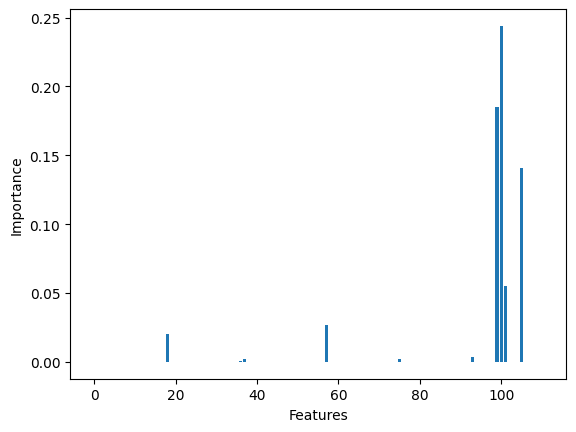

In [110]:
knn_features = features(knn_model)

In [160]:
all_feature_values(knn_features)

0.0,
0.14108,
0.0035,
0.02005,
5e-05,
0.24394,
0.02647,
0.05479,
-1e-05,
5e-05,
0.18509,
3e-05,
0.00011,


### Logistic Regression

qty_dot_url :  -0.0001
qty_hyphen_url :  0.00021
qty_underline_url :  -5e-05
qty_slash_url :  0.00257
qty_questionmark_url :  0.0
qty_equal_url :  1e-05
qty_at_url :  0.0
qty_and_url :  -1e-05
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  0.0
qty_comma_url :  0.0
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.00054
qty_tld_url :  0.0
length_url :  0.00296
qty_dot_domain :  0.00267
qty_hyphen_domain :  -4e-05
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  -0.00088
domain_length :  -0.00013
domain_in_ip :  0.0
server_client_domain :  0.0
qty_dot_directory :  0.

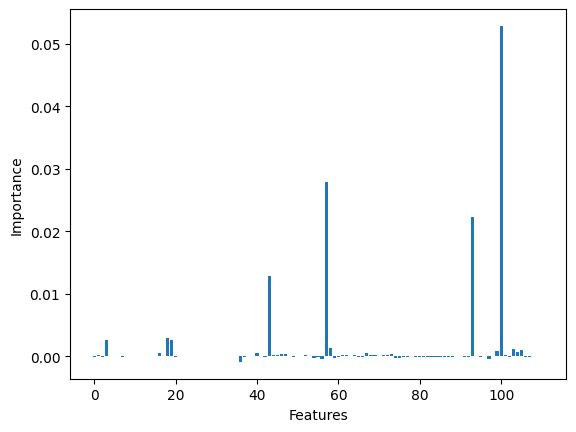

In [106]:
log_features = features(log_model)

In [161]:
all_feature_values(log_features)

0.0,
0.00108,
0.02227,
0.00296,
-0.00045,
0.05284,
0.02788,
0.0002,
0.00053,
0.01285,
0.0008,
-6e-05,
0.00267,


### Linear SVC

qty_dot_url :  0.00013
qty_hyphen_url :  -0.00184
qty_underline_url :  -0.00143
qty_slash_url :  0.01469
qty_questionmark_url :  1e-05
qty_equal_url :  -0.00157
qty_at_url :  0.00013
qty_and_url :  -0.00169
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  -8e-05
qty_comma_url :  -8e-05
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.0
qty_tld_url :  0.00079
length_url :  -0.03552
qty_dot_domain :  0.00642
qty_hyphen_domain :  0.00099
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  0.00011
domain_length :  -0.00134
domain_in_ip :  0.0006
server_client_domain :  0.0

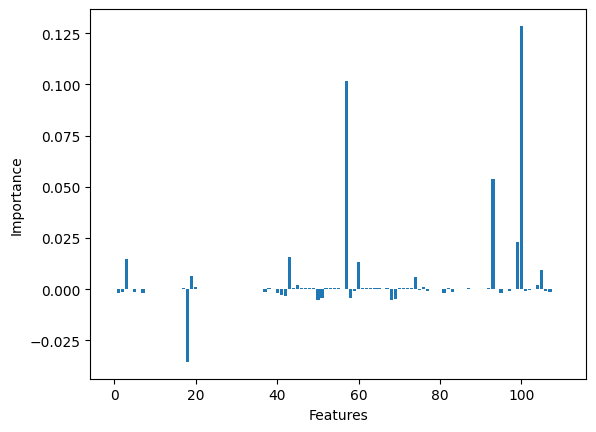

In [107]:
svm_features = features(linear_svm)

In [173]:
all_feature_values(svm_features)

-5e-05,
0.00951,
0.05372,
-0.03552,
-0.00091,
0.12859,
0.10154,
-0.00097,
-0.00199,
0.01591,
0.02311,
0.00043,
0.00642,


### Decision Tree

qty_dot_url :  0.0
qty_hyphen_url :  0.0
qty_underline_url :  0.0
qty_slash_url :  0.00515
qty_questionmark_url :  0.0
qty_equal_url :  0.0
qty_at_url :  0.0
qty_and_url :  0.0
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  0.0
qty_comma_url :  0.0
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  4e-05
qty_tld_url :  0.0
length_url :  0.0013
qty_dot_domain :  0.01639
qty_hyphen_domain :  0.0
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  0.0
domain_length :  0.0
domain_in_ip :  0.00095
server_client_domain :  0.0
qty_dot_directory :  0.0
qty_hyphen_directory :  0.

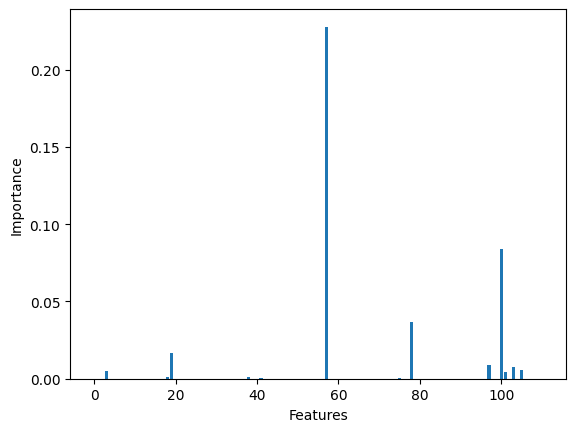

In [135]:
dt_features = features(decision_tree)

In [174]:
all_feature_values(dt_features)

0.03685,
0.00565,
0.0,
0.0013,
0.00916,
0.08388,
0.2277,
0.00406,
0.0,
0.0,
0.0,
0.0,
0.01639,


### Naive Bayes

qty_dot_url :  -8e-05
qty_hyphen_url :  -0.00015
qty_underline_url :  -0.00014
qty_slash_url :  0.00661
qty_questionmark_url :  0.0
qty_equal_url :  -0.00073
qty_at_url :  -3e-05
qty_and_url :  -0.00036
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  0.0
qty_comma_url :  0.0
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.00018
qty_tld_url :  3e-05
length_url :  0.02389
qty_dot_domain :  0.00023
qty_hyphen_domain :  1e-05
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  -3e-05
domain_length :  0.00076
domain_in_ip :  0.0
server_client_domain :  0.0
qty_dot_directo

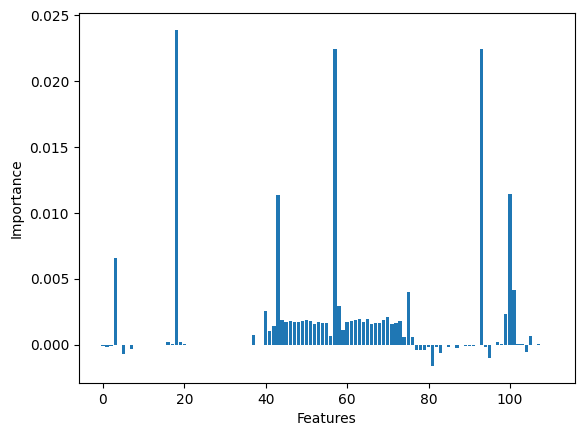

In [124]:
nb_features = features(naive_bayes)

In [175]:
all_feature_values(nb_features)

-0.00039,
0.00069,
0.02241,
0.02389,
0.00019,
0.01142,
0.02244,
0.00416,
0.00252,
0.01133,
0.00233,
0.00192,
0.00023,


### AdaBoost

qty_dot_url :  0.0
qty_hyphen_url :  0.0
qty_underline_url :  0.0
qty_slash_url :  0.00123
qty_questionmark_url :  0.0
qty_equal_url :  0.0
qty_at_url :  0.00431
qty_and_url :  0.0
qty_exclamation_url :  0.0
qty_space_url :  0.0
qty_tilde_url :  0.0
qty_comma_url :  0.0
qty_plus_url :  0.0
qty_asterisk_url :  0.0
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.00108
qty_tld_url :  0.00157
length_url :  -0.00013
qty_dot_domain :  0.01133
qty_hyphen_domain :  0.00147
qty_underline_domain :  0.0
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  0.0
domain_length :  0.00452
domain_in_ip :  0.0
server_client_domain :  0.0
qty_dot_directory :  0.0
qty_hyphen

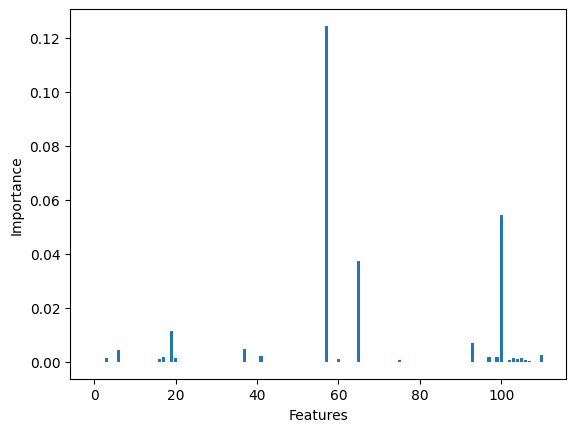

In [111]:
ada_features = features(adaboost)

In [176]:
all_feature_values(ada_features)

0.0,
0.00119,
0.00704,
-0.00013,
0.00175,
0.05421,
0.12445,
0.0,
0.0,
0.0,
0.00168,
0.0374,
0.01133,


### MLP

qty_dot_url :  6e-05
qty_hyphen_url :  0.00182
qty_underline_url :  0.00039
qty_slash_url :  0.00564
qty_questionmark_url :  0.0001
qty_equal_url :  0.00079
qty_at_url :  0.001
qty_and_url :  0.00253
qty_exclamation_url :  1e-05
qty_space_url :  3e-05
qty_tilde_url :  -1e-05
qty_comma_url :  3e-05
qty_plus_url :  0.0001
qty_asterisk_url :  0.00013
qty_hashtag_url :  0.0
qty_dollar_url :  0.0
qty_percent_url :  0.00117
qty_tld_url :  -8e-05
length_url :  0.03671
qty_dot_domain :  0.00829
qty_hyphen_domain :  0.00516
qty_underline_domain :  0.0001
qty_slash_domain :  0.0
qty_questionmark_domain :  0.0
qty_equal_domain :  0.0
qty_at_domain :  0.0
qty_and_domain :  0.0
qty_exclamation_domain :  0.0
qty_space_domain :  0.0
qty_tilde_domain :  0.0
qty_comma_domain :  0.0
qty_plus_domain :  0.0
qty_asterisk_domain :  0.0
qty_hashtag_domain :  0.0
qty_dollar_domain :  0.0
qty_percent_domain :  0.0
qty_vowels_domain :  0.00097
domain_length :  0.00103
domain_in_ip :  0.0004
server_client_domain

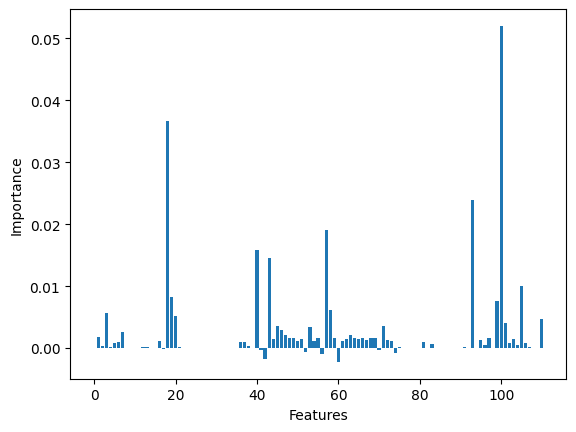

In [112]:
mlp_features = features(mlp)

In [177]:
all_feature_values(mlp_features)

5e-05,
0.01004,
0.02395,
0.03671,
0.00168,
0.052,
0.01914,
0.0041,
0.01578,
0.01455,
0.00767,
0.00145,
0.00829,


## Comparison

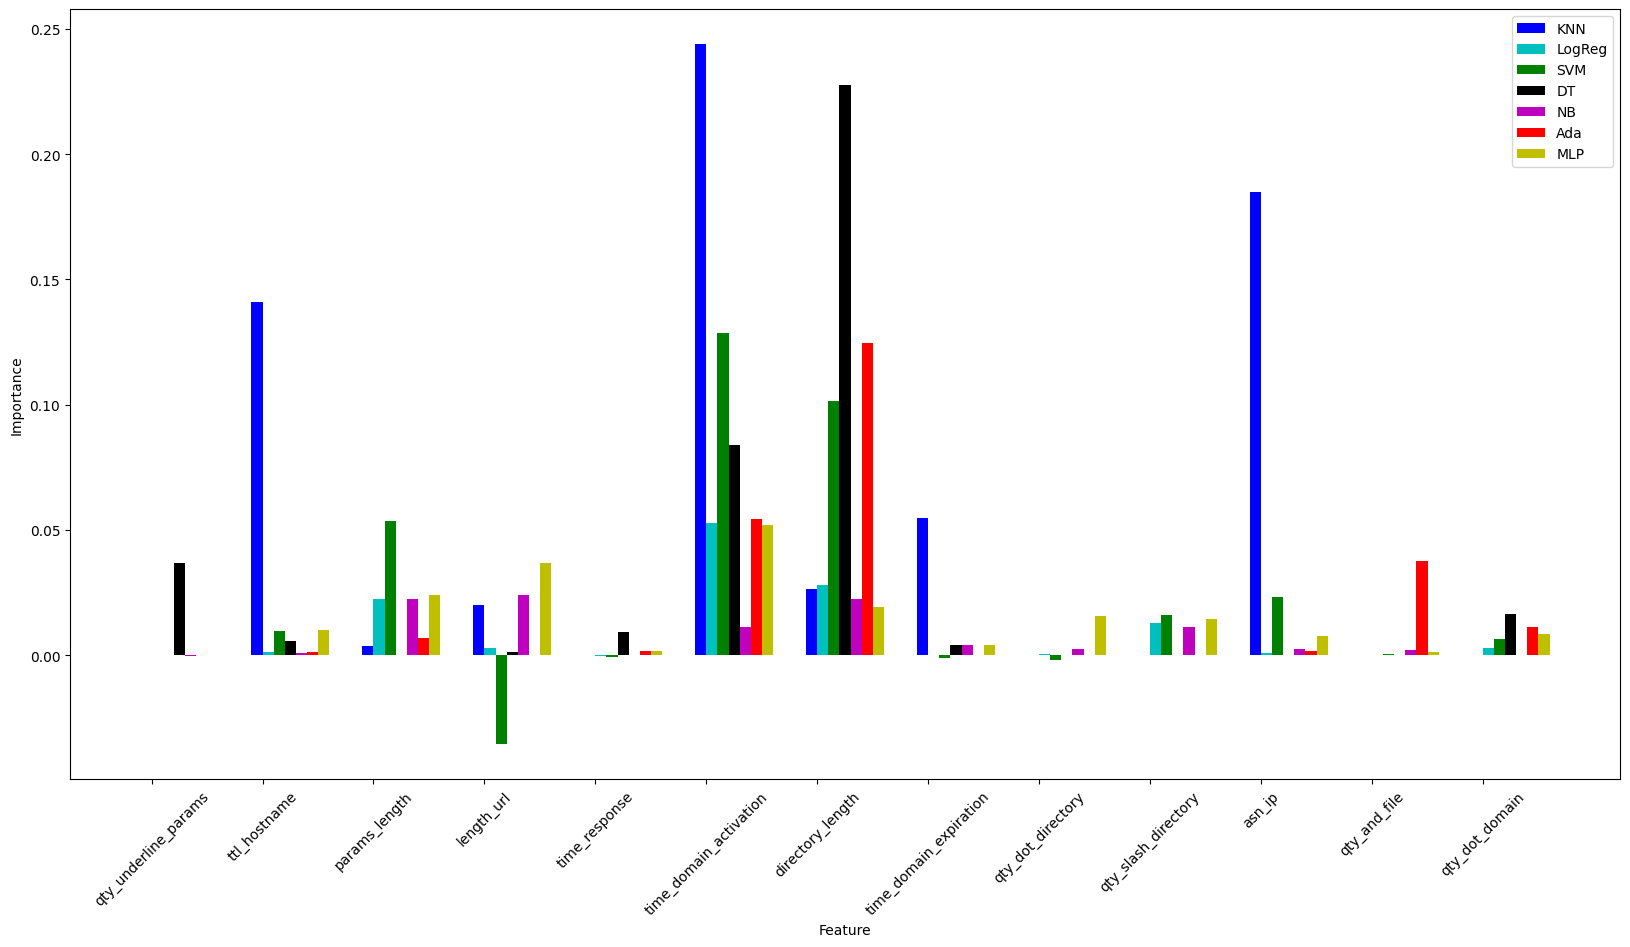

In [187]:
KNN = [0.0,
0.14108,
0.0035,
0.02005,
5e-05,
0.24394,
0.02647,
0.05479,
-1e-05,
5e-05,
0.18509,
3e-05,
0.00011]

LogReg = [0.0,
0.00108,
0.02227,
0.00296,
-0.00045,
0.05284,
0.02788,
0.0002,
0.00053,
0.01285,
0.0008,
-6e-05,
0.00267]

SVM = [-5e-05,
0.00951,
0.05372,
-0.03552,
-0.00091,
0.12859,
0.10154,
-0.00097,
-0.00199,
0.01591,
0.02311,
0.00043,
0.00642]

DT = [0.03685,
0.00565,
0.0,
0.0013,
0.00916,
0.08388,
0.2277,
0.00406,
0.0,
0.0,
0.0,
0.0,
0.01639]

NB = [-0.00039,
0.00069,
0.02241,
0.02389,
0.00019,
0.01142,
0.02244,
0.00416,
0.00252,
0.01133,
0.00233,
0.00192,
0.00023]

Ada = [0.0,
0.00119,
0.00704,
-0.00013,
0.00175,
0.05421,
0.12445,
0.0,
0.0,
0.0,
0.00168,
0.0374,
0.01133]

MLP = [5e-05,
0.01004,
0.02395,
0.03671,
0.00168,
0.052,
0.01914,
0.0041,
0.01578,
0.01455,
0.00767,
0.00145,
0.00829]


n=13
r = np.arange(n)
width = 0.1

plt.bar(r, KNN, color ='b', width=width, label='KNN')
plt.bar(r+width, LogReg, color ='c', width=width, label='LogReg')
plt.bar(r+2*width, SVM, color ='g', width=width, label='SVM')
plt.bar(r+3*width, DT, color ='k', width=width, label='DT')
plt.bar(r+4*width, NB, color ='m', width=width, label='NB')
plt.bar(r+5*width, Ada, color ='r', width=width, label='Ada')
plt.bar(r+6*width, MLP, color ='y', width=width, label='MLP')

plt.xticks(r + width/2,['qty_underline_params', 'ttl_hostname', 'params_length', 'length_url', 'time_response', 'time_domain_activation', 'directory_length', 'time_domain_expiration', 'qty_dot_directory', 'qty_slash_directory', 'asn_ip', 'qty_and_file', 'qty_dot_domain'], rotation=45)
plt.legend()

plt.xlabel("Feature")
plt.ylabel("Importance")
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

## Feature Selection

In [127]:
KNN = ['time_domain_activation', 'asn_ip', 'ttl_hostname', 'time_domain_expiration', 'directory_length']
LogReg = ['time_domain_activation', 'directory_length', 'params_length', 'qty_slash_directory', 'length_url']
SVM = ['time_domain_activation', 'directory_length', 'params_length', 'asn_ip', 'qty_slash_directory']
DT = ['directory_length', 'time_domain_activation', 'qty_underline_params', 'qty_dot_domain', 'time_response']
NB = ['length_url', 'directory_length', 'params_length', 'time_domain_activation', 'qty_slash_directory']
Ada = ['directory_length', 'time_domain_activation', 'qty_and_file', 'qty_dot_domain', 'params_length']
MLP = ['time_domain_activation', 'length_url', 'params_length', 'directory_length', 'qty_dot_directory']

features = list(set().union(KNN, LogReg, SVM, DT, NB, Ada, MLP))
print(features)

['qty_underline_params', 'ttl_hostname', 'params_length', 'length_url', 'time_response', 'time_domain_activation', 'directory_length', 'time_domain_expiration', 'qty_dot_directory', 'qty_slash_directory', 'asn_ip', 'qty_and_file', 'qty_dot_domain']


In [190]:
new_df = df.loc[:, df.columns.intersection(['qty_underline_params', 'ttl_hostname', 'params_length', 'length_url', 'time_response', 'time_domain_activation', 'directory_length', 'time_domain_expiration', 'qty_dot_directory', 'qty_slash_directory', 'asn_ip', 'qty_and_file', 'qty_dot_domain', 'phishing'])]
new_df

,length_url,qty_dot_domain,qty_dot_directory,qty_slash_directory,directory_length,qty_and_file,qty_underline_params,params_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,phishing
0,25,2,1,1,8,0,-1,-1,0.207316,60781,-1,-1,892,1
1,223,2,3,3,42,0,1,165,0.499566,36024,579,150,9540,1
2,15,2,0,1,1,0,-1,-1,0.935901,4766,-1,-1,589,0
3,81,2,2,5,62,0,-1,-1,0.410021,20454,-1,-1,292,1
4,19,2,-1,-1,-1,-1,-1,-1,0.410761,53831,6998,306,3597,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,3,-1,-1,-1,-1,-1,-1,0.135186,8560,5509,334,3597,0
88643,34,2,-1,-1,-1,-1,-1,-1,0.397981,26496,5046,431,591,0
88644,70,1,1,5,48,0,-1,-1,0.745030,394695,1844,712,14391,1
88645,28,2,0,1,1,0,-1,-1,0.307057,47583,-1,-1,52,1


## New Performances

### Setting Up

In [192]:
x = new_df.drop(labels='phishing', axis=1)
y = new_df['phishing']
new_train_x, new_test_x, new_train_y, new_test_y = train_test_split(x, y, test_size=0.1, random_state=19)

### KNN

Decision Tree Train Accuracy 0.932
Decision Tree Test Accuracy 0.929


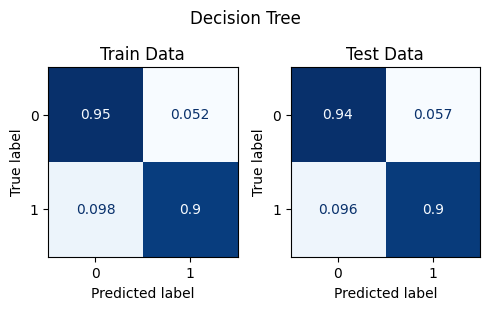

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [197]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(new_train_x, new_train_y)
evaluate(decision_tree, "Decision Tree")
plt.figure(figsize=(10,6))

### Logistic Regression

Logistic Regression Train Accuracy 0.914
Logistic Regression Test Accuracy 0.918


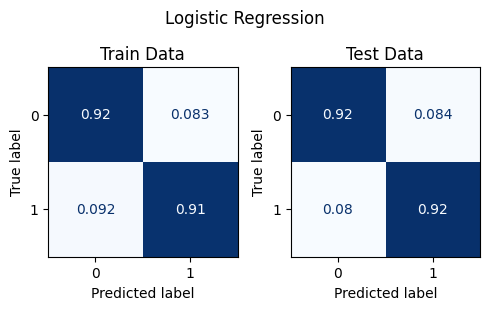

In [198]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(new_train_x, new_train_y)
evaluate(log_model, "Logistic Regression")

### SVM

Linear SVM Train Accuracy 0.806
Linear SVM Test Accuracy 0.803


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


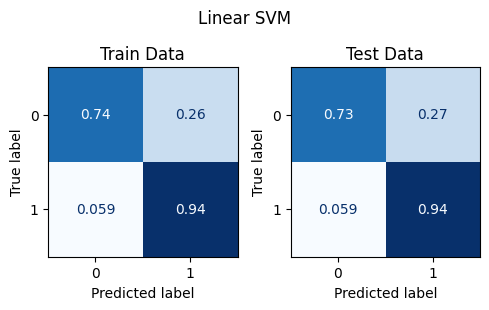

In [199]:
linear_svm = LinearSVC()
linear_svm.fit(new_train_x, new_train_y)
evaluate(linear_svm, "Linear SVM")

### Decision Tree

Decision Tree Train Accuracy 0.932
Decision Tree Test Accuracy 0.929


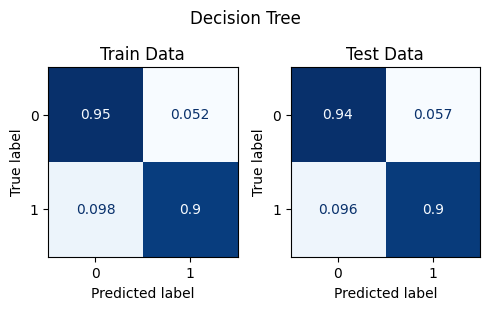

In [200]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(new_train_x, new_train_y)
evaluate(decision_tree, "Decision Tree")

### Naive Bayes

Naive Bayes Train Accuracy 0.836
Naive Bayes Test Accuracy 0.826


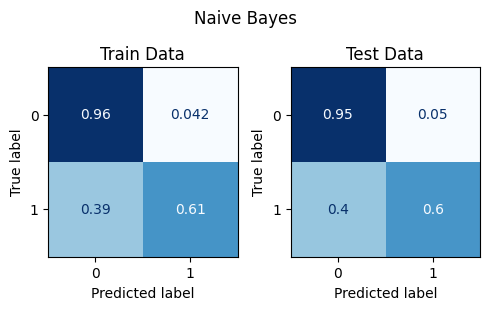

In [201]:
naive_bayes = GaussianNB()
naive_bayes.fit(new_train_x, new_train_y)
evaluate(naive_bayes, "Naive Bayes")

### AdaBoost

AdaBoost Train Accuracy 0.929
AdaBoost Test Accuracy 0.926


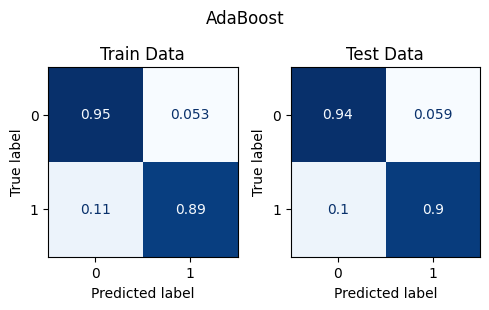

In [202]:
adaboost = AdaBoostClassifier()
adaboost.fit(new_train_x, new_train_y)
evaluate(adaboost, "AdaBoost")

### MLP

MLP Train Accuracy 0.916
MLP Test Accuracy 0.917


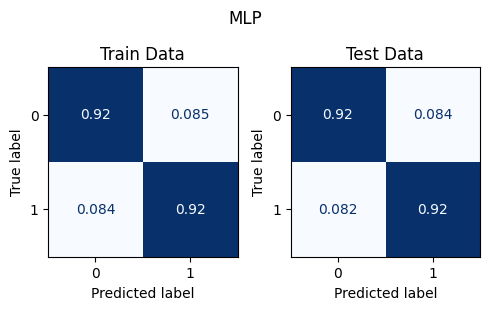

In [203]:
mlp = MLPClassifier()
mlp.fit(new_train_x, new_train_y)
evaluate(mlp, "MLP")